In [4]:
# Import required libraries
import statistics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Load a random dataset
df = sns.load_dataset('tips')
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Mean, median and mode:

In [7]:
print(np.mean(df["total_bill"]))
print(np.median(df["total_bill"]))
print(statistics.mode(df["total_bill"]))

19.785942622950824
17.795
13.42


/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='total_bill'>

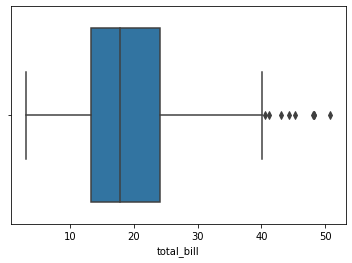

In [8]:
# To see box plot: which is used to see outliers
sns.boxplot(df["total_bill"])
# We can see below it has outliers

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

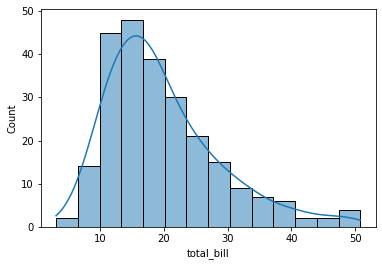

In [10]:
# Hist plot
sns.histplot(df["total_bill"], kde=True) # If kde=True, it shows probability density function(displays curve line)
# As we can see below it is not normally distributed data as it is little skewed towards right

In [11]:
# To see normally distributed dataset, we can read iris dataset
df1 = sns.load_dataset('iris')
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

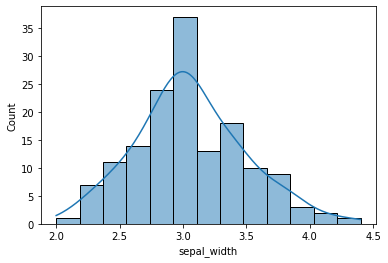

In [15]:
# `sepal_length` doesn't follow gaussian(normal) distribution(we can check below), so we will use `sepal_width`
# It is gaussian(normal) distribution
sns.histplot(df1["sepal_width"], kde=True)

/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='species', ylabel='count'>

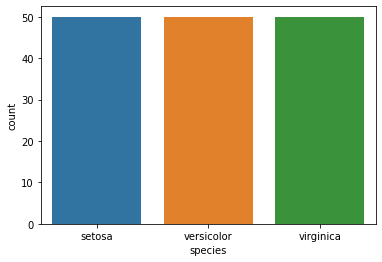

In [16]:
# Count plot(bar graph or bar plot)
sns.countplot(df1["species"])

## Percentile:

In [20]:
np.percentile(df1['sepal_length'], [25, 75, 99]) # Getting 25th and 75th and 99th percentile

array([5.1, 6.4, 7.7])

## Outliers(any data points which are different from other data points):

(array([25.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 10. ,  19.1,  28.2,  37.3,  46.4,  55.5,  64.6,  73.7,  82.8,
         91.9, 101. ]),
 <BarContainer object of 10 artists>)

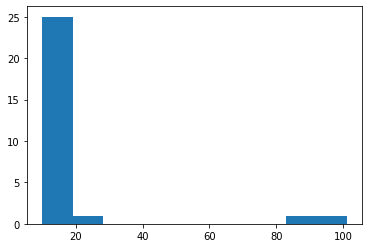

In [25]:
# Take some random data
dataset = [11,10,12,13,15,16,89,19,17,11,22,12,13,12,15,16,17,18,101,11,13,14,16,16,18,16,15,10]

# Plot histogram
plt.hist(dataset)

In [26]:
# After 3rd std deviation in both side, data present can be treated as outliers
def detect_outliers(dataset):
    """
    This function detects outliers based on empirical formula
    If data point lies below 3rd std dev then it is treated as outlier
    """
    outliers = []
    threshold = 3 # 3 standard deviation
    mean = np.mean(dataset)
    std = np.std(dataset)
    
    for i in dataset:
        # For every data point, find z-score
        z_score = (i-mean)/std
        # Now check if it falls below 3rd std dev
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

print(detect_outliers(dataset))

[89, 101]


## IQR(Interquartile range):

Steps:
1. Sort the data
2. Calculate Q1 and Q3
3. Calculate IQR(Q3-Q1)
4. Find lower fence: Q1 - 1.5(IQR) and upper fence: Q3 + 1.5(IQR)

In [30]:
# 1
data = sorted(dataset)
# 2
q1, q3 = np.percentile(data, [25, 75])
q1, q3

(12.0, 17.0)

In [33]:
# 3
iqr = q3-q1
# 4
lower_fence = q1 - (1.5 * iqr)
higher_fence = q3 + (1.5 * iqr)
lower_fence, higher_fence

(4.5, 24.5)

In [36]:
# Now based on lower fence and higher fence we can remove the outliers
# We can remove all the elements falling below or after lower or higher fence respectively
outliers = []
for i in dataset:
    if i < 4.5 or i > 24.5:
        outliers.append(i)

outliers

[89, 101]

/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

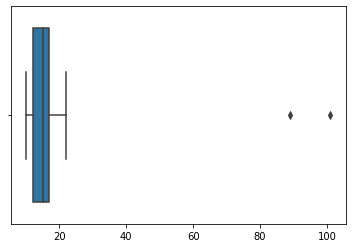

In [37]:
# We can also create boxplot to find outliers
sns.boxplot(dataset)